In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import os
print(os.getcwd())

C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithemtic\IPyNb


In [3]:
df = pd.read_csv("../Cpp/Output/SinVar.txt", sep='\t')
df.head()

NoiseType  Noise        X           sin  Error Deviation  Error Minimum  \
0  Gaussian    1.0 -3.14159 -1.224610e-16         1.003140      -1.520870   
1   Uniform    1.0 -3.14159 -1.224610e-16         1.123590      -1.520870   
2  Gaussian    1.0 -2.94524 -1.950900e-01         0.999991      -1.236890   
3   Uniform    1.0 -2.94524 -1.950900e-01         1.118700      -1.236890   
4  Gaussian    1.0 -2.74889 -3.826830e-01         0.996567      -0.978172   

   Error Maximum  Value Deviation  Uncertainty      Mean  ...     1.1     1.3  \
0        1.52087         0.659584     0.657520 -0.012510  ...  0.0622  0.0679   
1        1.52087         0.738784     0.657520  0.000099  ...  0.0746  0.1854   
2        1.83647         0.650749     0.650754  0.064513  ...  0.0472  0.0476   
3        1.83552         0.728001     0.650754  0.084013  ...  0.0584  0.0784   
4        2.19094         0.628925     0.631092  0.139057  ...  0.0401  0.0383   

      1.5     1.7     1.9  2.1  2.3  2.5  2.7  2.9  
0  0.0997  0.0000  0.0000  0.0  0.0  0.0  0.0  0.0  
1  0.0000  0.0000  0.0000  0.0  0.0  0.0  0.0  0.0  
2  0.0507  0.0742  0.0000  0.0  0.0  0.0  0.0  0.0  
3  0.1146  0.0000  0.0000  0.0  0.0  0.0  0.0  0.0  
4  0.0354  0.0367  0.0596  0.0  0.0  0.0  0.0  0.0  

[5 rows x 41 columns]

In [4]:
sorted(df['Noise'].unique())

[1e-17,
 1e-16,
 1e-15,
 1e-14,
 1e-13,
 1e-12,
 1e-11,
 1e-10,
 1e-09,
 1e-08,
 1e-07,
 1e-06,
 1e-05,
 0.0001,
 0.001,
 0.01,
 0.1,
 1.0]

In [5]:
sNoise=sorted(df[df['Noise'] > 1e-5]['Noise'].unique())

# Deviation vs Uncertainty

In [6]:
def PlotValues( sValue=['Value Deviation', 'Uncertainty'], 
                sNoise=sNoise, noiseType='Gaussian',
                sStyle=['x', '-', '--', '+'], sColor = ['r','g','b','y','c','m']):
    fig, ax = plt.subplots()
    ax.set_title('sin(x +/- noise)')
    ax.set_xlabel('x')
    ax.set_ylabel(' or '.join(sValue))
    plt.grid(True)
    for noise, color in zip(sNoise, sColor):
        for value, style in zip(sValue, sStyle):
            dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)]
            if dfPlot.empty:
                continue
            ax.plot(dfPlot['X'], dfPlot[value], ''.join([color, style]), label=f'{noise} {value}')
    ax.legend(bbox_to_anchor=(1.1, 1.05))

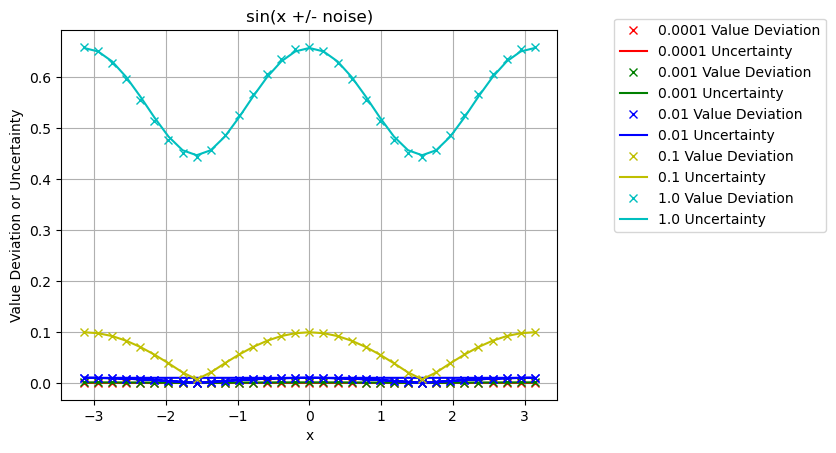

In [7]:
PlotValues()

In [8]:
def PlotErrorDev( noiseType='Gaussian', sNoise=sNoise,
                  sColor = ['r','g','b','y','c','m'] ):
    
    fig, ax = plt.subplots()
    ax.set_title(r'$\sin(x \pm \delta x)$ with ' + noiseType + ' noise')
    ax.set_xlabel('x')
    ax.set_ylabel('Uncertainty or Value Deviation')
    ax.set_yscale('log')
    plt.grid(True)
    for noise, color in zip(sNoise, sColor):
        dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)]
        if dfPlot.empty:
            continue
        ax.plot(dfPlot['X'], dfPlot['Uncertainty'], ''.join([color, '-']), label=f'{noise} Uncertainty')

    ax2 = ax.twinx()
    ax2.set_ylabel('Error Deviation')
    for noise, color in zip(sNoise, sColor):
        dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)]
        if dfPlot.empty:
            continue
        ax2.plot(dfPlot['X'], dfPlot['Error Deviation'], ''.join([color, '--']), label=f'{noise} Error Deviation')
        ax.plot(dfPlot['X'], dfPlot['Value Deviation'], ''.join([color, 'x']), label=f'{noise} Value Deviation')

    ax.legend(bbox_to_anchor=(1.57, 1.0))
    ax2.legend(bbox_to_anchor=(1.57, 0.3))

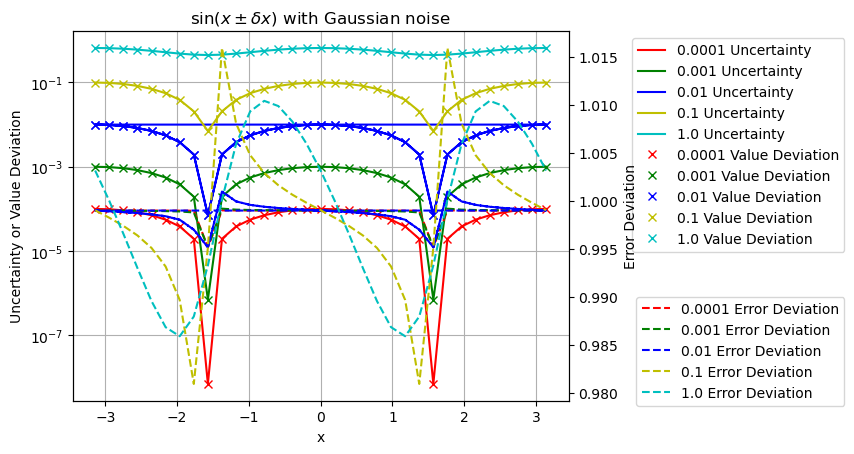

In [9]:
PlotErrorDev()

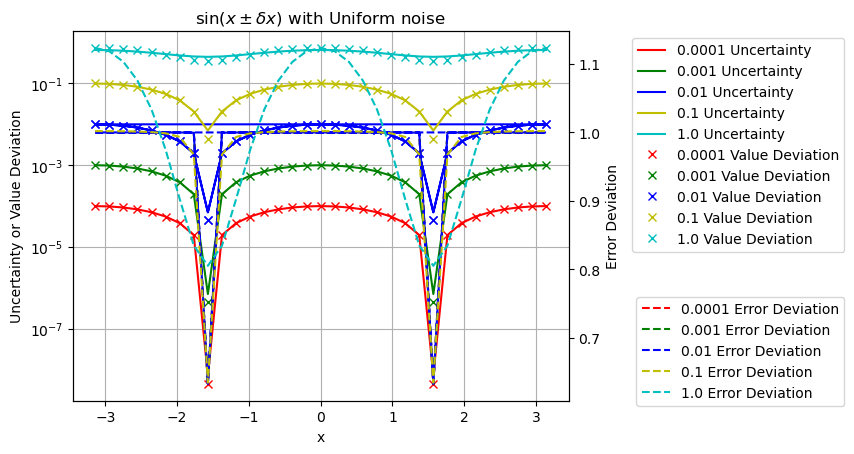

In [10]:
PlotErrorDev('Uniform')

# Mean vs Bias

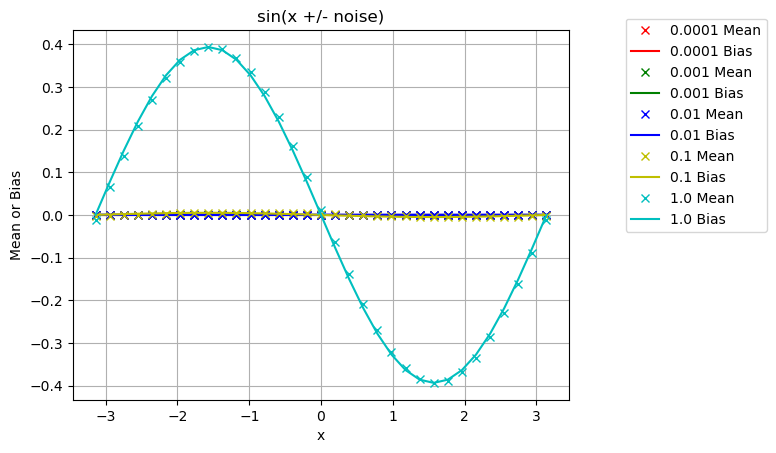

In [11]:
PlotValues(sValue=['Mean', 'Bias'])

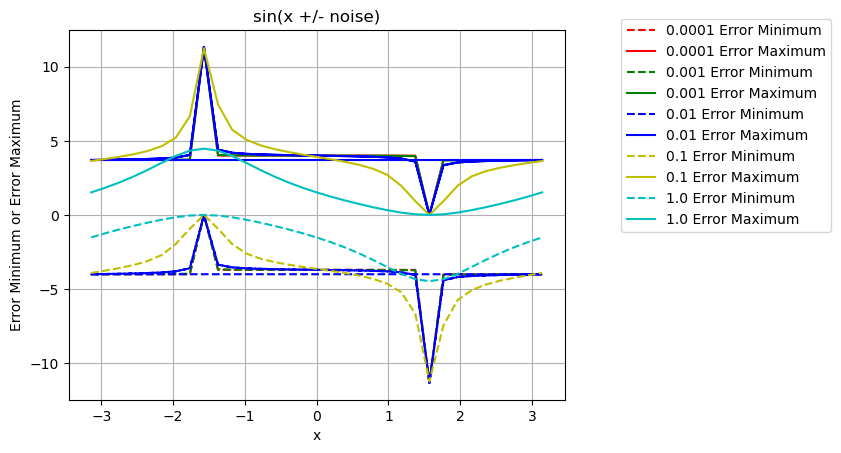

In [12]:
PlotValues(sValue=['Error Minimum', 'Error Maximum'], sStyle=['--', '-'])

# Histogram

In [13]:
sHisto = [str(i/10) for i in range(-29, 30, 2)]
df[sHisto].head()

-2.9  -2.7  -2.5  -2.3  -2.1  -1.9  -1.7    -1.5    -1.3    -1.1  ...  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0913  0.0768  0.0615  ...   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0000  0.1854  0.0746  ...   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0000  0.1420  0.0869  ...   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0000  0.1012  0.1680  ...   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0000  0.0250  0.1899  ...   

      1.1     1.3     1.5     1.7     1.9  2.1  2.3  2.5  2.7  2.9  
0  0.0622  0.0679  0.0997  0.0000  0.0000  0.0  0.0  0.0  0.0  0.0  
1  0.0746  0.1854  0.0000  0.0000  0.0000  0.0  0.0  0.0  0.0  0.0  
2  0.0472  0.0476  0.0507  0.0742  0.0000  0.0  0.0  0.0  0.0  0.0  
3  0.0584  0.0784  0.1146  0.0000  0.0000  0.0  0.0  0.0  0.0  0.0  
4  0.0401  0.0383  0.0354  0.0367  0.0596  0.0  0.0  0.0  0.0  0.0  

[5 rows x 30 columns]

In [14]:
def PlotHisto( sNoiseType=['Uniform'], sNoise=df['Noise'].unique(), sX=df['X'].unique() ):
    df['algo'] = df['NoiseType'] + " " + df['Noise'].astype(str) + " " + df['X'].astype(str)
    dfPlot = df[(df['NoiseType'].isin(sNoiseType)) & (df['Noise'].isin(sNoise)) & (df['X'].isin(sX))].set_index('algo')
    # return dfPlot
    ax = dfPlot[sHisto].T.plot()
    ax.legend(bbox_to_anchor=(1.1, 1.05))    


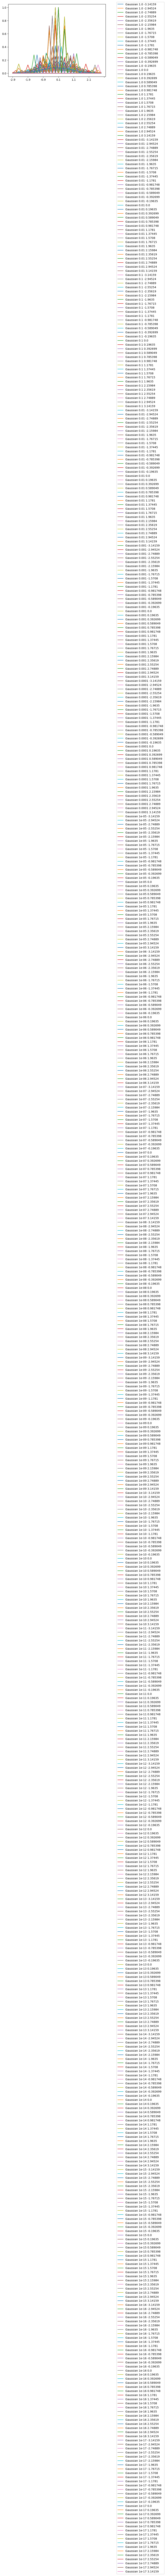

In [15]:
PlotHisto(sNoiseType=['Gaussian'])

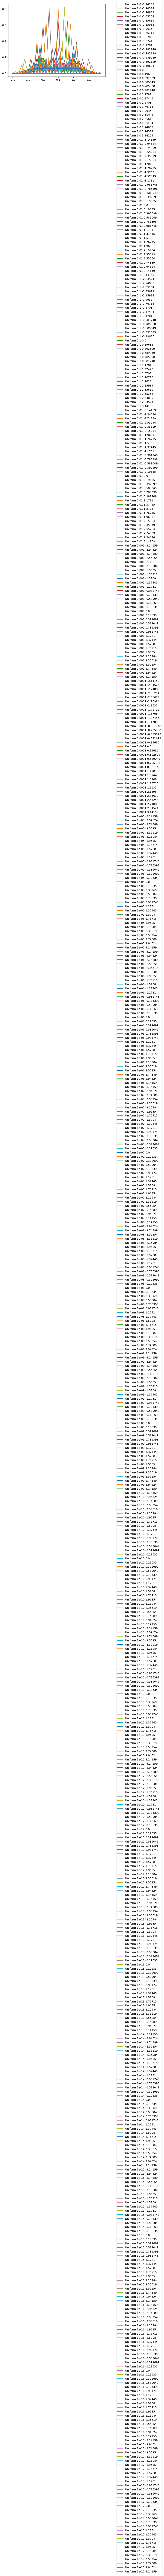

In [16]:
PlotHisto()

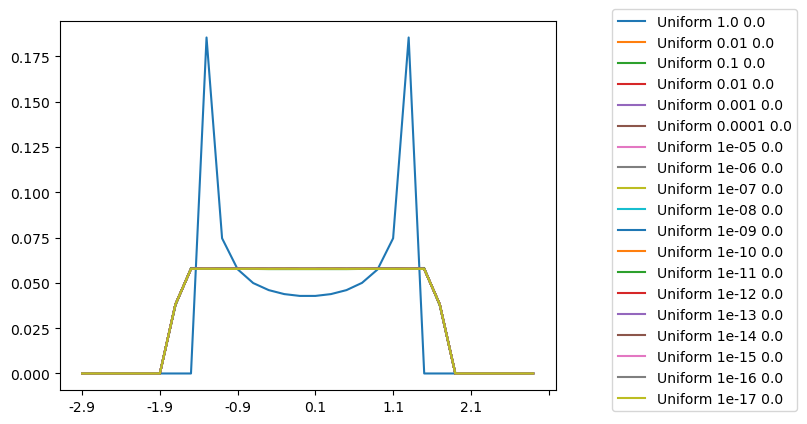

In [17]:
PlotHisto(sX=[0])

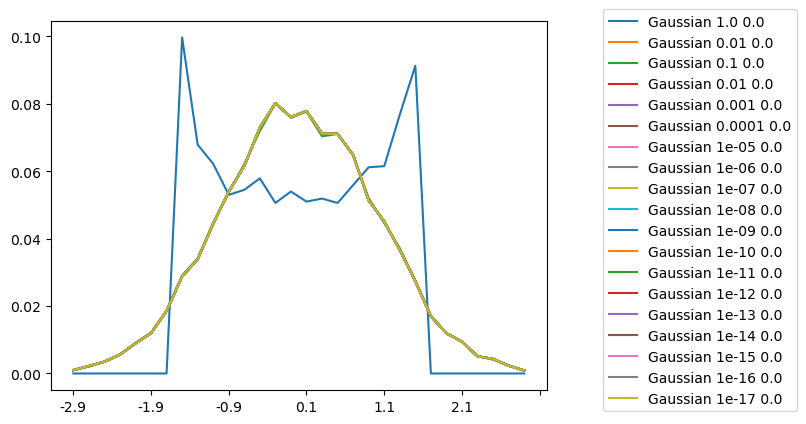

In [18]:
PlotHisto(['Gaussian'], sX=[0])

In [19]:
PlotHisto(['Gaussian'], sX=[math.pi/2])

TypeError: no numeric data to plot

In [ ]:
PlotHisto(['Uniform'], sX=[math.pi/2])

In [ ]:
PlotHisto(['Uniform'], sX=[-math.pi/2])

In [ ]:
PlotHisto(['Uniform'], sX=[math.pi/4])

In [ ]:
PlotHisto(['Uniform'], sX=[-math.pi/4])

In [ ]:
PlotHisto(['Uniform'], sX=[math.pi])

In [ ]:
PlotHisto(['Uniform'], sX=[-math.pi])